Crank-Nicholson Scheme

Discretized form:


\begin{eqnarray}
\frac{T^{n+1}_i - T^n_i}{\Delta t} = & \nonumber \\
\alpha \cdot \frac{1}{2} &\left( 
\frac{T^{n+1}_{i+1} - 2T^{n+1}_i + T^{n+1}_{i-1}}{\Delta x^2} 
+ \frac{T^n_{i+1}-2T^n_i + T^n_{i-1}}{\Delta x^2}
\right)
\end{eqnarray}

Re-arranging so everything we don't know is on LHS:

$$-T_{i-1}^{n+1} + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} + 1 \right) T_i^{n+1} - T_{i+1}^{n+1} = T_{i-1}^n + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} - 1 \right) T_i^n + T_{i+1}^n$$

For Dirichlet Boundary:

$$ 2 \left( \frac{\Delta x^2}{\alpha \Delta t} + 1 \right) T_1^{n+1} - T_2^{n+1} = T_0^n + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} -1 \right) T_1^n + T_2^n + T_0^{n+1}$$

And if we have Neumann BC:

$$ -T_{nx-3}^{n+1} + \left( 2 \frac{\Delta x^2}{\alpha \Delta t} +1 \right) T_{n_x-2}^{n+1} = T_{n_x-3}^n + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} -1 \right) T_{n_x-2}^n + T_{n_x-1}^n + q \Delta x$$



In [1]:
import numpy
from scipy.linalg import solve

In [2]:
def generateMatrix(N,sigma):
    d= 2* numpy.diag(numpy.ones(N-2)*(1+1./sigma))
    
    d[-1,-1] = 1+2./sigma
    ud = numpy.diag(numpy.ones(N-3)*-1,1)
    ld = numpy.diag(numpy.ones(N-3)*-1,-1)
    
    A = d+ud+ld
    
    return A

In [15]:
def generateRHS(T,sigma):
    
    b = T[1:-1]*2*(1./sigma-1) + T[:-2] + T[2:]
    
    b[0] += T[0]
    
    return b

In [16]:
def CrankNicolson(T,A,nt,sigma):
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma)
        
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        T[-1] = T[-2]
        
    return T

In [17]:
L = 1
nx = 21
alpha = 1.22e-3

dx = L/(nx-1)

Ti = numpy.zeros(nx)
Ti[0] = 100

sigma = 0.5
dt = sigma * dx*dx/alpha
nt = 10

A = generateMatrix(nx, sigma)

In [18]:
print(A)

[[ 6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0

In [19]:
T = CrankNicolson(Ti.copy(), A, nt, sigma)

from matplotlib import pyplot
%matplotlib inline


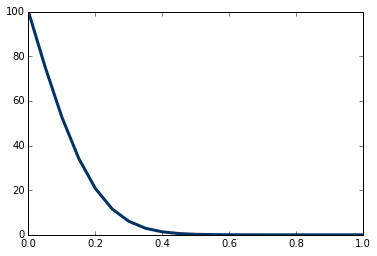

In [20]:
x = numpy.linspace(0,L,nx)
pyplot.plot(x,T, color='#003366', ls='-', lw =3);

In [21]:
from math import pi
def T_analytical(x,t,n_max, alpha, L):
    
    T = 100
    for n in range(1,n_max+1):
        k = (2*n-1)*pi/(2*L)
        
        summation = 400/((2*n-1)*pi)*numpy.sin(k*x) * numpy.exp(-alpha*k*k*t)
        T-= summation
        
    return T

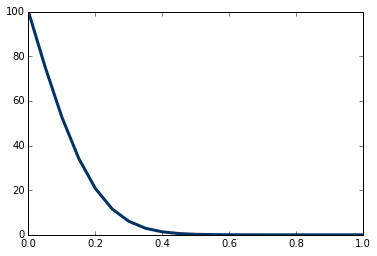

In [24]:
T_exact = T_analytical (x,dt*nt,100,alpha,L)
pyplot.plot(x,T,color='#003366', ls='-', lw =3);

In [25]:
T1 = T_analytical(x,.2,100,alpha,L)
T2 = T_analytical(x,.2,200,alpha,L)
numpy.sqrt(numpy.sum((T1-T2)**2)/numpy.sum(T2**2))

6.9279171182600926e-13

In [35]:
#Time Convergence

def L2_error(T,T_exact):
    
    e = numpy.sqrt(numpy.sum((T-T_exact)**2)/numpy.sum(T_exact)**2)
    
    return e



In [36]:
def generateMatrix_btcs(N,sigma):
    
    d= numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    
    d[-1,-1] = 1+1./sigma
    ud = numpy.diag(numpy.ones(N-3)*-1,1)
    ld = numpy.diag(numpy.ones(N-3)*-1,-1)
    
    A = d+ud+ld
    
    return A

In [37]:
def generateRHS_btcs(T,simga):
    b = numpy.zeros_like(T)
    b = T[1:-1]*1./sigma
    b[0] += T[0]
    
    return b

In [38]:
def implicit_btcs(T, A, nt, sigma):
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS_btcs(Tn,sigma)
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        T[-1] = T[-2]
        
    return T


In [39]:
nx = 1001
dx = L/(nx-1)

dt_values = numpy.asarray([1.0, 0.5, 0.25, 0.125])
error = numpy.zeros(len(dt_values))
error_ftcs = numpy.zeros(len(dt_values))

t_final = 10
t_initial = 1

x = numpy.linspace(0,L,nx)

Ti = T_analytical(x,t_initial, 100,alpha,L)
T_exact = T_analytical(x,t_final,100,alpha,L)

for i,dt in enumerate(dt_values):
    sigma = alpha*dt/dx**2
    
    nt = int((t_final-t_initial)/dt)
    A = generateMatrix(nx,sigma)
    A_btcs = generateMatrix_btcs(nx,sigma)
    T = CrankNicolson(Ti.copy(), A,nt,sigma)
    error[i] = L2_error(T,T_exact)
    T = implicit_btcs(Ti.copy(), A_btcs, nt,sigma)
    error_ftcs[i] = L2_error(T,T_exact)

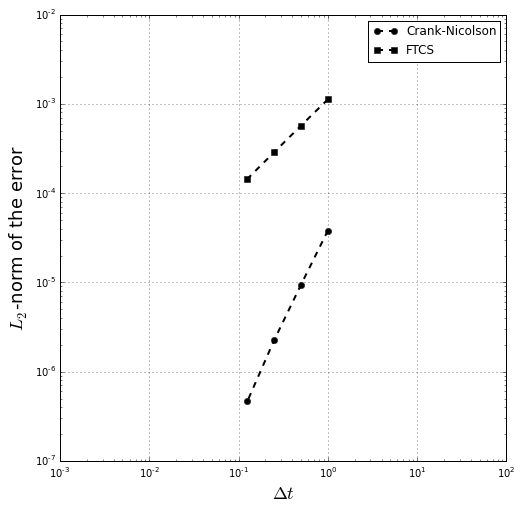

In [40]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values, error, color='k', ls='--', lw=2, marker='o')
pyplot.loglog(dt_values, error_ftcs, color='k', ls='--', lw=2, marker='s')
pyplot.legend(['Crank-Nicolson', 'FTCS']);

In [41]:
error


array([  3.81125927e-05,   9.41813943e-06,   2.25089054e-06,
         4.63970974e-07])

In [42]:
#Spatial Convergence

nx_values = numpy.asarray([11,21,41,81,161])

dt = 0.1
error = numpy.zeros(len(nx_values))

t_final = 20

x = numpy.linspace(0,L,nx)

for i,nx in enumerate(nx_values):
    dx = L/(nx-1)
    x = numpy.linspace(0,L,nx)
    sigma = alpha*dt/dx**2
    
    nt = int(t_final/dt)
    
    A = generateMatrix(nx,sigma)
    
    Ti = numpy.zeros(nx)
    Ti[0] = 100
    
    T = CrankNicolson(Ti.copy(), A, nt, sigma)
    
    T_exact = T_analytical(x, t_final, 100 , alpha, L)
    
    error[i] = L2_error(T,T_exact)

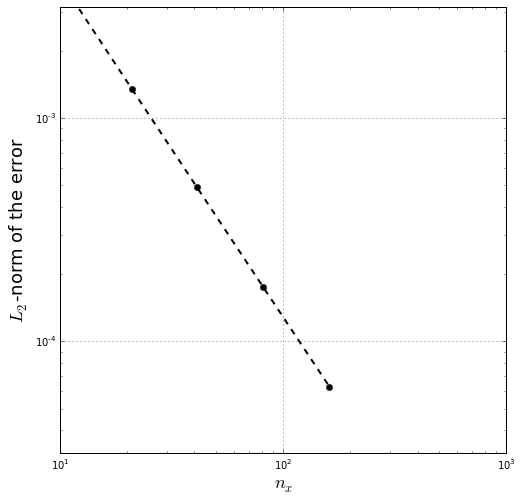

In [45]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o');

In [46]:
nx_values = numpy.asarray([11,21,41,81,161])

dt = 0.1
error = numpy.zeros(len(nx_values))

t_final = 1000

x = numpy.linspace(0,L,nx)

for i,nx in enumerate(nx_values):
    dx = L/(nx-1)
    x = numpy.linspace(0,L,nx)
    sigma = alpha*dt/dx**2
    
    nt = int(t_final/dt)
    
    A = generateMatrix(nx,sigma)
    
    Ti = numpy.zeros(nx)
    Ti[0] = 100
    
    T = CrankNicolson(Ti.copy(), A, nt, sigma)
    
    T_exact = T_analytical(x, t_final, 100 , alpha, L)
    
    error[i] = L2_error(T,T_exact)

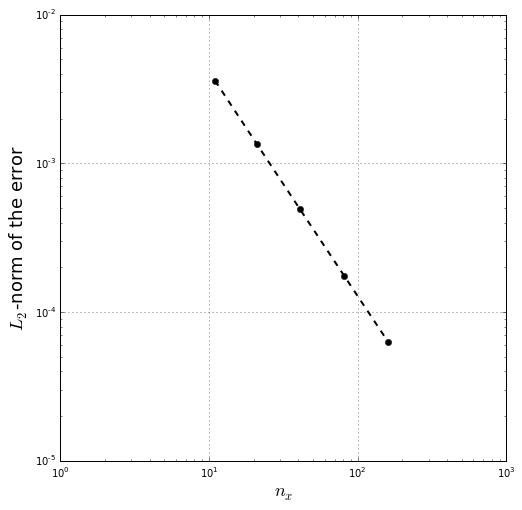

In [49]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.xlim(1, 1000)
pyplot.ylim(1e-5, 1e-2)
pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o');

In [48]:
error

array([  3.59569224e-03,   1.34923182e-03,   4.90905474e-04,
         1.76021088e-04,   6.26681531e-05])